In [1]:
from transformers import AutoTokenizer
import pandas as pd
from tqdm import tqdm
from pathlib import Path
import os
import re
import matplotlib.pyplot as plt

tokenizer = AutoTokenizer.from_pretrained('NbAiLab/nb-bert-base')

base_dir = Path(os.getcwd()).parent
train_dir = base_dir / 'data' / 'train'
dev_dir = base_dir / 'data' / 'dev'
test_dir = base_dir / 'data' / 'test'

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text) 
    text = re.sub(r'\s([?.!"](?:\s|$))', r'\1', text)  
    return text.strip()

all_texts = []

for folder in [train_dir, dev_dir, test_dir]:
    for file in folder.iterdir():
        with open(file, 'r', encoding='utf-8') as f:
            all_texts.append(f.read())

all_texts = [preprocess_text(text) for text in all_texts]

tokenized_lengths = []
for text in tqdm(all_texts, desc="Tokenizing texts"):
    length = len(tokenizer.encode(text, add_special_tokens=True))
    tokenized_lengths.append(length)

df = pd.DataFrame({"text": all_texts, "token_length": tokenized_lengths})

print(df.describe())  

Tokenizing texts: 100%|██████████| 43437/43437 [01:02<00:00, 697.69it/s] 

       token_length
count  43437.000000
mean     706.799342
std      452.973931
min        7.000000
25%      396.000000
50%      629.000000
75%      888.000000
max     6466.000000


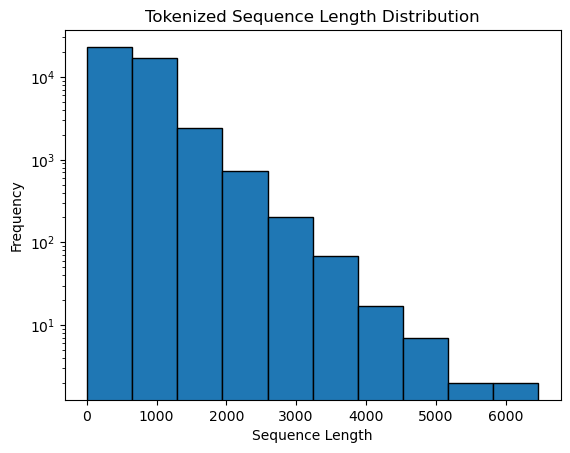

In [2]:
# log scale

plt.hist(df["token_length"], bins=10, edgecolor="black")
plt.yscale('log')
plt.title("Tokenized Sequence Length Distribution")
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.show()

In [20]:
all_texts[240][:300]

'master of none s01 mesterlig av aziz ansari. jeg blir truffet av alt aziz ansari kaster mot meg i hans nye komiserie master of none. jeg elsker musikken, digger humoren og storkoser meg med den laidbacke stemningen. jeg liker barene de henger på, jakkene de bruker, nabolagene de rusler rundt i, venn'